In [8]:
#load Data
import pandas as pd
import re
import os

# List of file paths
file_paths = [
    'sim2712-0.21',
    'sim2712-0.26',
    'sim2712-0.31',
    'sim2712-0.36',
    'sim2712-0.41',
    'sim2712-0.46',
    'sim2712-0.51',
    'sim2712-0.56',
    'sim2712-0.61',
    'sim2712-0.66',
    'sim2712-0.71',
    'sim2712-0.76',
    'sim2712-0.81',
    'sim2712-0.86',
    'sim2712-0.91',
    'sim2712-0.96',
    'sim2712-1.01',
    'sim2712-1.06',
    'sim2712-1.11',
    'sim2712-1.36',
    'sim2712-1.53',
    'sim2712-1.58',
    'sim2712-1.63'
    
]

# Define a function to extract time from the file name
def extract_time(file_path):
    time_match = re.search(r'sim2712-(\d+(\.\d+)?)', file_path)
    if time_match:
        time_value = float(time_match.group(1))
        return time_value
    else:
        return None

# Read and process each file
dfs = []
for file_path in file_paths:
    # Extract time from the file name
    time_value = extract_time(file_path)

    # Read the CSV file
    df = pd.read_csv(file_path, delimiter=',')  # Replace '\t' with the actual delimiter
    df['Time'] = time_value  # Set the time value for the new file

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames along the time axis
combined_data = pd.concat(dfs, ignore_index=True)

# Filter the data
data_cleaned = combined_data[
    (combined_data['    x-coordinate'] >= -0.18) & (combined_data['    x-coordinate'] <= 0.18) &
    (combined_data['    y-coordinate'] >= -0.18) & (combined_data['    y-coordinate'] <= 0.18)
]

# Reset the index after filtering
data_cleaned.reset_index(drop=True, inplace=True)
data=data_cleaned
# Display the descriptive statistics of the cleaned data
df = data_cleaned.describe()
df

# Display the column names of the 'data' DataFrame
#print("Column Names:", data.columns)

Column Names: Index(['nodenumber', '    x-coordinate', '    y-coordinate',
       '  total-pressure', '     temperature', 'Time'],
      dtype='object')


In [9]:
# ML model (temperature and pressure)
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the target variable
y_p= data[ '  total-pressure']
y_t= data[ '     temperature']

# Define features, including time
X = data[['Time', '    x-coordinate', '    y-coordinate']]

#-----------------------------------------------------------------
#model total-pressure
# Split the data into training and testing sets
X_train, X_test, y_p_train, y_p_test = train_test_split(X, y_p, test_size=0.2, random_state=42)

# Train a random forest model (considering temporal aspects)
model_p = RandomForestRegressor(n_estimators=100, random_state=42)
model_p.fit(X_train, y_p_train)

# Make predictions on the test set
y_p_pred = model_p.predict(X_test)

# Evaluate the model
mse_p = mean_squared_error(y_p_test, y_p_pred)
print(f'Mean Squared Error: {mse_p}')
#----------------------------------------------------------------
#model temperature
# Split the data into training and testing sets
X_train, X_test, y_t_train, y_t_test = train_test_split(X, y_t, test_size=0.2, random_state=42)

# Train a random forest model (considering temporal aspects)
model_t = RandomForestRegressor(n_estimators=100, random_state=42)
model_t.fit(X_train, y_t_train)

# Make predictions on the test set
y_t_pred = model_t.predict(X_test)

# Evaluate the model
mse_t = mean_squared_error(y_t_test, y_t_pred)
print(f'Mean Squared Error: {mse_t}')
#----------------------------------------------------------------



Mean Squared Error: 0.005360392580003436
Mean Squared Error: 0.0017520676799557592


In [19]:
# add index of refraction to the data using our equation

some_coefficient = 1.00034
another_coefficient = 3.576*(10^-10)

# Add a new column using the specified equation
data['index_of_refraction'] = some_coefficient -(another_coefficient*(data['  total-pressure'] / data['     temperature']))

# Display the updated DataFrame
data.describe()


C:\Users\PIV\AppData\Local\Temp\ipykernel_20384\846395869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index_of_refraction'] = some_coefficient -(another_coefficient*(data['  total-pressure'] / data['     temperature']))


,nodenumber,x-coordinate,y-coordinate,total-pressure,temperature,Time,index_of_refraction
count,252952.000000,252952.000000,252952.000000,252952.000000,252952.000000,252952.000000,252952.000000
mean,11668.014173,-0.010759,-0.009733,-0.391291,300.595114,0.799955,0.981688
std,4300.543059,0.098672,0.099935,1.522082,0.702720,0.413968,0.072512
min,4221.000000,-0.179996,-0.180000,-14.863748,299.999932,0.210000,0.291696
25%,7952.000000,-0.092907,-0.095832,-0.464734,300.022187,0.460000,0.978213
50%,11657.000000,-0.013611,-0.009293,-0.157517,300.325946,0.760000,0.992845
75%,15324.000000,0.070249,0.072887,0.140651,300.938456,1.060000,1.007033
max,20406.000000,0.179991,0.179997,5.500235,307.914716,1.630000,1.262246


In [20]:
#model for index of refraction

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the target variable
y_n= data['index_of_refraction']


# Define features, including time
X = data[['Time', '    x-coordinate', '    y-coordinate']]

#-----------------------------------------------------------------
#model total-pressure
# Split the data into training and testing sets
X_train, X_test, y_n_train, y_n_test = train_test_split(X, y_n, test_size=0.2, random_state=42)

# Train a random forest model (considering temporal aspects)
model_n = RandomForestRegressor(n_estimators=100, random_state=42)
model_n.fit(X_train, y_n_train)

# Make predictions on the test set
y_n_pred = model_n.predict(X_test)

# Evaluate the model
mse_n = mean_squared_error(y_n_test, y_n_pred)
print(f'Mean Squared Error: {mse_n}')

Mean Squared Error: 1.2104987484729037e-05


In [21]:
#make pridection of the value of index of refraction depending on time and coordinates
# Define new data for prediction (replace this with your actual data)
new_data = pd.DataFrame({
    'Time': [1.25, 1.30, 1.35],  # Add the time values for prediction
    '    x-coordinate': [0.1, 0.05, -0.2],  # Add x-coordinate values for prediction
    '    y-coordinate': [-0.15, 0.1, 0.05]  # Add y-coordinate values for prediction
})

# Make predictions using the trained model
predictions = model_n.predict(new_data)

# Display the predictions
print("Predictions for Index of Refraction:")
print(predictions)


Predictions for Index of Refraction:
[1.01010672 1.02801738 1.00896152]


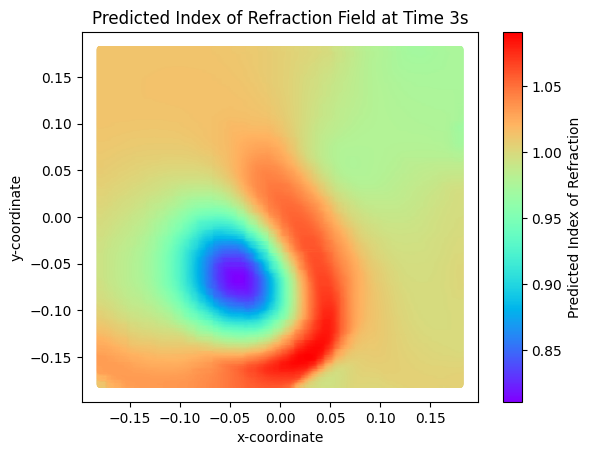

In [22]:
#plot the pridected index of refraction field in a specific_time
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate data for a specific time and within the specified range
specific_time = 3  # Update with your desired time

# Create a DataFrame with simulated data for the specific time and range
x_range = np.linspace(-0.18, 0.18, 1000)  # Adjust the number of points as needed
y_range = np.linspace(-0.18, 0.18, 1000)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

simulated_data = pd.DataFrame({
    '    x-coordinate': x_mesh.flatten(),
    '    y-coordinate': y_mesh.flatten(),
    'Time': specific_time
})


# Use the trained model to predict the target variable for the simulated data
X_simulated = simulated_data[['Time', '    x-coordinate', '    y-coordinate']]
y_simulated_pred = model_n.predict(X_simulated)

# Plot the predicted index of refraction field using a rainbow colormap
plt.scatter(simulated_data['    x-coordinate'], simulated_data['    y-coordinate'], c=y_simulated_pred, cmap='rainbow', s=10)
plt.colorbar(label='Predicted Index of Refraction')
plt.title(f'Predicted Index of Refraction Field at Time {specific_time}s')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

In [13]:
# Load New Data and compare with the predictions
import pandas as pd
import re
import os

# List of file paths
file_paths = [
    'sim2712-3.41'
]

# Define a function to extract time from the file name
def extract_time(file_path):
    time_match = re.search(r'sim2712-(\d+(\.\d+)?)', file_path)
    if time_match:
        time_value = float(time_match.group(1))
        return time_value
    else:
        return None

# Read and process each file
dfss_list = []
for file_path in file_paths:
    # Extract time from the file name
    time_value = extract_time(file_path)

    # Read the CSV file
    dfss = pd.read_csv(file_path, delimiter=',')  # Replace '\t' with the actual delimiter
    dfss['Time'] = time_value  # Set the time value for the new file

    # Append the DataFrame to the list
    dfss_list.append(dfss)

# Concatenate the DataFrames along the time axis
New_data = pd.concat(dfss_list, ignore_index=True)

# Filter the data
New_data_cleaned = New_data[
    (New_data['    x-coordinate'] >= -0.18) & (New_data['    x-coordinate'] <= 0.18) &
    (New_data['    y-coordinate'] >= -0.18) & (New_data['    y-coordinate'] <= 0.18)
]

# Reset the index after filtering
New_data_cleaned.reset_index(drop=True, inplace=True)
data_341 = New_data_cleaned

# Display the descriptive statistics of the cleaned data
dfss_stats = New_data_cleaned.describe()

#to be contiue......

